# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 campaigns from May 2008 to November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv(r'data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
# get info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Summary statistics for numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
len(df)

41188

There are no missing values in this dataset and all the features are of the same size.

In [12]:
# Distribution of categorical features
df['job'].value_counts()


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [13]:
# Distribution of y
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

The y values are imbalanced. We need to keep that in mind when splitting to train and test data and also when modeling.

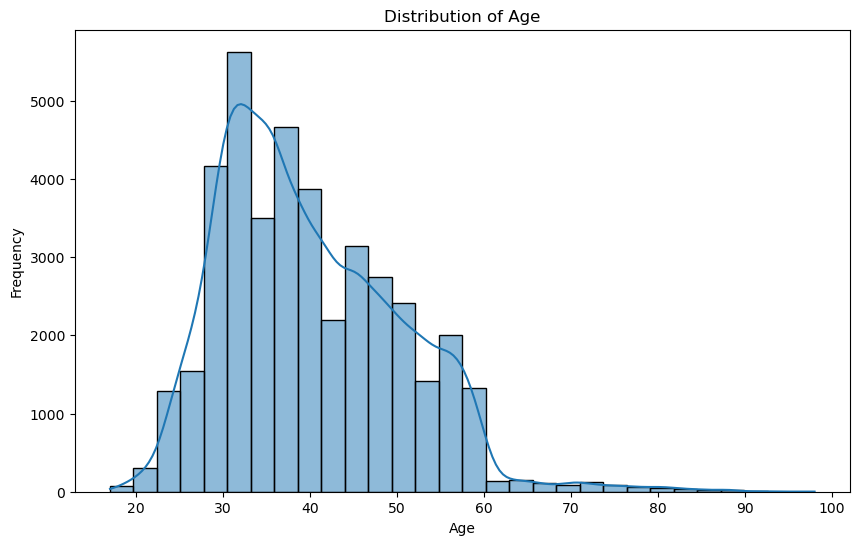

In [14]:
# Visualization for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
X = df.loc[:, : 'loan']
X.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [16]:
y = df['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [17]:
# Select non-numeric columns
non_numeric_cols = X.select_dtypes(exclude='number').columns.to_list()
non_numeric_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [18]:
col_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='if_binary'), non_numeric_cols)], 
                                    remainder=StandardScaler())

In [19]:
# Convert the categorical features to numeric (one hot encoding) + normalize the numeric features which in this case is age
X_transformed = col_transformer.fit_transform(X)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

For the baseline model, we choose a model that always guesses the most frequently occuring class.

In [21]:
baseline = y.value_counts(normalize=True)[0]
baseline

0.8873458288821987

88.73% is the accuracy of the baseline model given the dataset. Since the 88.73% of the data is 'no' class and our baseline model always guesses this class.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(random_state=42)
start = time.time()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start
print(f"Logistic regression training time: {lr_train_time} s")

Logistic regression training time: 0.2810056209564209 s


c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [24]:
train_acc = lr.score(X_train, y_train)
print(f"Train accuracy of logistic regression: %{train_acc * 100}")

Train accuracy of logistic regression: %88.73458288821988


In [25]:
test_acc = lr.score(X_test, y_test)
print(f"Test accuracy of logistic regression: %{test_acc * 100}")

Test accuracy of logistic regression: %88.73458288821988


The accuracy of the logistic regression model for both train and test data is same as the baseline model which guesses the most frequent class all the time. This means that the logisitc regression is not trained properly to distinguish between different classes and it always classifies the data as the most frequent one, 'no'. We will improve this model in problem 11.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [26]:
# Let add the logistic regression results to a dictionary first
results = {'Train Time': [lr_train_time], 'Train Accuracy': [train_acc],
           'Test Accuracy': [test_acc]}

In [27]:
def evaluate_model(model):
    """ This function trains the given model and calculates time, train acc, and test acc"""
    start = time.time()
    model.fit(X_train, y_train)
    model_train_time = time.time() - start

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    results['Train Time'].append(model_train_time)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)

In [28]:
# Create a list of models that we want to evaluate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = [KNeighborsClassifier(),
          DecisionTreeClassifier(random_state=42),
          SVC(random_state=42)
          ]

results['Model'] = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC']

for model in models:
    evaluate_model(model)

In [29]:
results_df = pd.DataFrame(results)
results_df

,Train Time,Train Accuracy,Test Accuracy,Model
0,0.281006,0.887346,0.887346,Logistic Regression
1,0.029995,0.891813,0.878800,KNN
2,0.827001,0.917775,0.866272,Decision Tree
3,72.054217,0.888090,0.886472,SVC


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

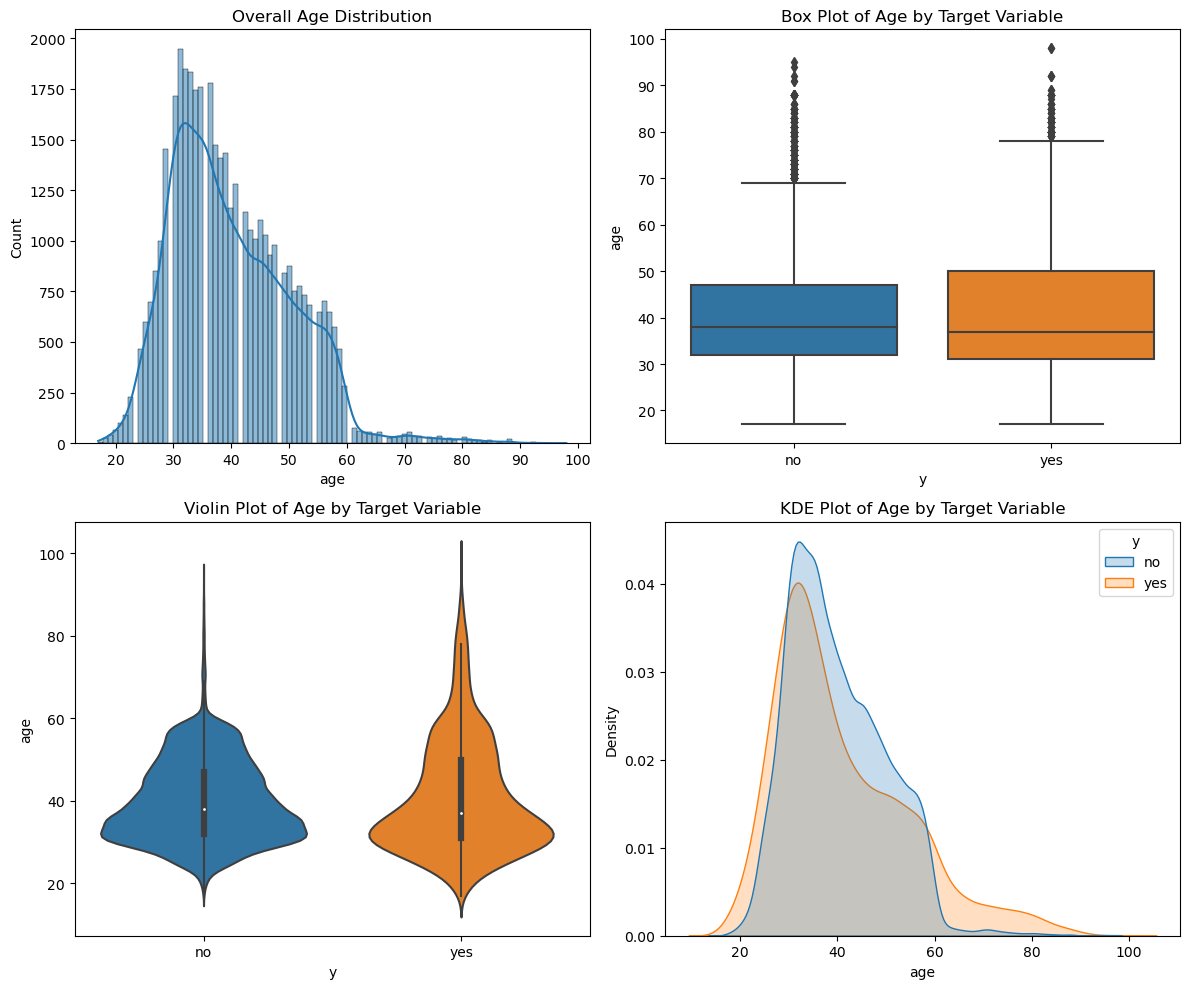

In [30]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histogram for overall age distribution
sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Overall Age Distribution')

# Box plot for age by target variable
sns.boxplot(x=y, y='age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Age by Target Variable')

# Violin plot for age by target variable
sns.violinplot(x=y, y='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Age by Target Variable')

# KDE plot for age by target variable
sns.kdeplot(data=df, x='age', hue=y, fill=True, common_norm=False, ax=axes[1, 1])
axes[1, 1].set_title('KDE Plot of Age by Target Variable')

plt.tight_layout()
plt.show()

In [31]:
def plot_categorical(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Bar plot for gender distribution
    sns.countplot(x=feature, data=df, ax=axes[0])
    axes[0].set_title(f'{feature} Distribution')

    # Bar plot for gender distribution by target variable
    sns.countplot(x=feature, hue=y, data=df, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution by Target Variable')

    plt.tight_layout()
    plt.show()

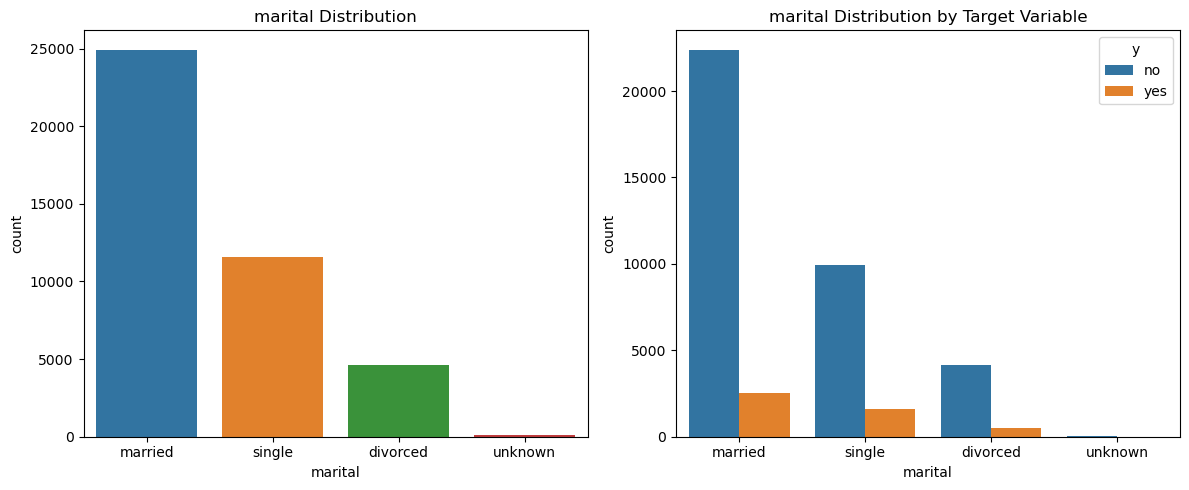

In [32]:
plot_categorical('marital')

In [33]:
df['y_binary'] = df['y'].map({'no': 0, 'yes': 1})

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [35]:
df['job'].dtype

dtype('O')

In [36]:
# Let's take a look at the correlation matrix and find the correlated features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'housemaid'

<Figure size 1000x1000 with 0 Axes>

In [38]:
# according to the correaltion matrix, I select the following numeric features.
selected_numeric_features = ['duration', 'pdays', 'euribor3m']

In [39]:
non_numeric_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

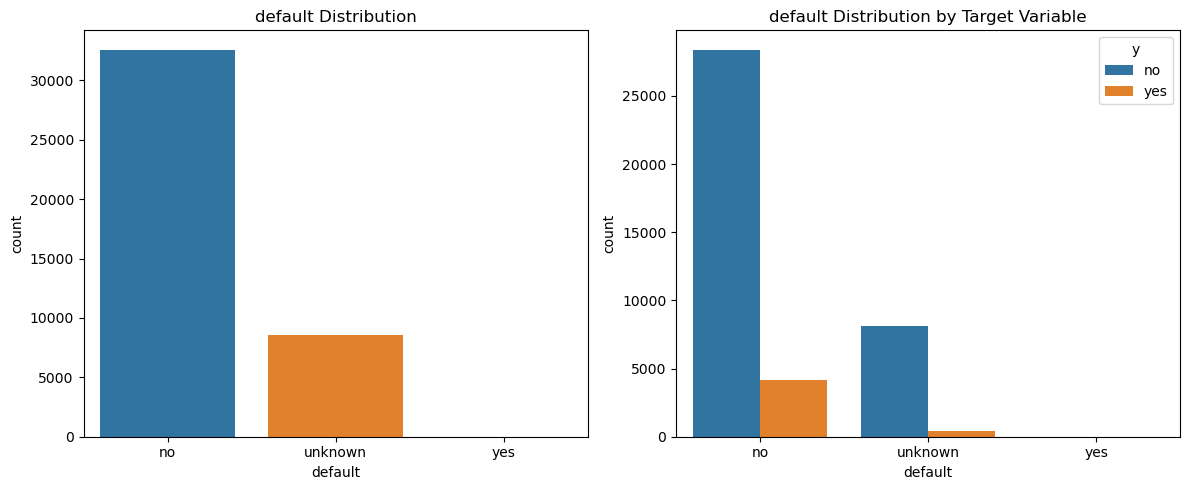

In [40]:
plot_categorical('default')

default is not very useful. Most of the data is 'no' in distribution (left plot)

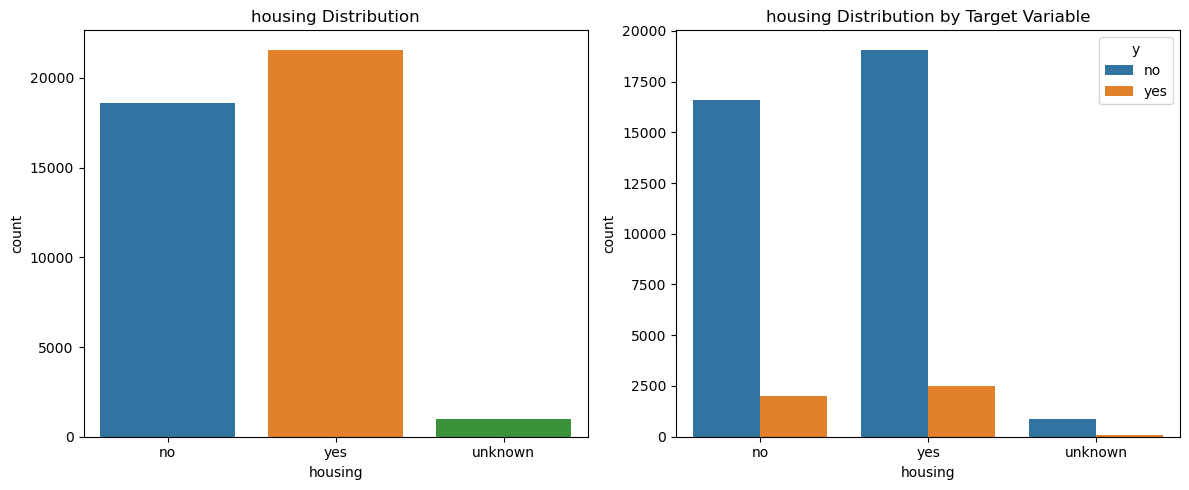

In [41]:
plot_categorical('housing')

Housing is a good categorical feature to select since there is almost even number of categories in the distribution excluding unknown values

In [42]:
selected_cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
selected_features = selected_numeric_features + selected_cat_features
selected_features

['duration',
 'pdays',
 'euribor3m',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan']

Now, let's create the models with the new data. We are going to use Pipeline to preprocessing and model creation.

In [43]:
X = df[selected_cat_features]
y = df['y'].map({'no': 0, 'yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Logistic Regression

In [44]:
preprocess = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='if_binary'), selected_cat_features),
    ],
    remainder=StandardScaler())

In [45]:
logreg_pipe = Pipeline([
    ('preprocess', preprocess),
    ('logreg', LogisticRegression(random_state=42))
])
logreg_pipe.fit(X_train, y_train)

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('logreg', LogisticRegression(random_state=42))])

In [46]:
def evaluate_classification_model(pipeline):
    y_pred = pipeline.predict(X_test)
    try:
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except:
        roc_auc = None

    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print or log the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("Confusion Matrix:\n", conf_matrix)

    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

    return metrics_dict

In [47]:
logreg_eval_res = evaluate_classification_model(logreg_pipe)

Accuracy: 0.8873458288821987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.6526736214633189
Confusion Matrix:
 [[9137    0]
 [1160    0]]


c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like we still cannot handle the imbalanced data. Let's define class weight for each of the output classes and fit the model again.

In [48]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)

# Create a dictionary to pass to the logistic regression model
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [49]:
logreg_pipe = Pipeline([
    ('preprocess', preprocess),
    ('logreg', LogisticRegression(class_weight=class_weight_dict, random_state=42))
])
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('logreg',
                 LogisticRegression(class_weight={0: 0.5634781656999015,
                                                  1: 4.438362068965517},
                                    random_state=42))])

In [50]:
logreg_eval_res = evaluate_classification_model(logreg_pipe)
modified_models_res = [logreg_eval_res]

Accuracy: 0.5993007672137516
Precision: 0.16110603290676417
Recall: 0.6077586206896551
F1-Score: 0.2546965317919075
AUC-ROC: 0.6532630211380027
Confusion Matrix:
 [[5466 3671]
 [ 455  705]]


Now it looks a lot better in terms of Recall, and AUC score and actually capturing minority class in the classifier.

### KNN

In [51]:
# use grid search to find the best combination of parameters

params = {'knn__n_neighbors': list(range(1, 10, 2)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p':[1, 2]}

knn_pipe = Pipeline([
    ('preprocess', preprocess),
    ('knn', KNeighborsClassifier())
])

grid_search = GridSearchCV(knn_pipe, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
knn_modified_res = evaluate_classification_model(grid_seach)

Accuracy: 0.8859862095756046
Precision: 0.1111111111111111
Recall: 0.0017241379310344827
F1-Score: 0.0033955857385398977
AUC-ROC: 0.5691329871345383
Confusion Matrix:
 [[9121   16]
 [1158    2]]


In [53]:
modified_models_res.append(knn_modified_res)

### Decision Tree

In [54]:
params = {'dt__criterion': ['gini', 'entropy'],
          'dt__max_depth': list(range(1, 15, 2)),
          'dt__min_samples_split': [2, 5, 10],
          'dt__min_samples_leaf': [1, 2, 4, 6]}

dt_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('dt', DecisionTreeClassifier(class_weight='balanced'))
])

grid_dt = GridSearchCV(dt_pipeline, param_grid=params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan'])])),
                                       ('dt',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'dt__min_samples_leaf': [1, 2, 4, 6],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [55]:
dt_modified_res = evaluate_classification_model(grid_dt)
modified_models_res.append(dt_modified_res)

Accuracy: 0.6891327571137225
Precision: 0.17218117571474462
Recall: 0.46206896551724136
F1-Score: 0.2508776035572198
AUC-ROC: 0.6391210613911605
Confusion Matrix:
 [[6560 2577]
 [ 624  536]]


### Support Vector Machine

In [56]:
params = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

svc_pipe = Pipeline([
    ('preprocess', preprocess),
    ('svc', SVC(probability=True, class_weight='balanced'))
])

grid_svc = GridSearchCV(svc_pipe, param_grid=params, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [60]:
modified_models_res.pop()

{'Accuracy': 0.11265417111780131,
 'Precision': 0.11265417111780131,
 'Recall': 1.0,
 'F1-Score': 0.2024962904774374,
 'AUC-ROC': 0.6316340249761296,
 'Confusion Matrix': array([[   0, 9137],
        [   0, 1160]], dtype=int64)}

In [61]:
svc_modified_res = evaluate_classification_model(grid_svc)
modified_models_res.append(svc_modified_res)

Accuracy: 0.11265417111780131
Precision: 0.11265417111780131
Recall: 1.0
F1-Score: 0.2024962904774374
AUC-ROC: 0.6316340249761296
Confusion Matrix:
 [[   0 9137]
 [   0 1160]]


In [66]:
dt_modified_res

{'Accuracy': 0.6891327571137225,
 'Precision': 0.17218117571474462,
 'Recall': 0.46206896551724136,
 'F1-Score': 0.2508776035572198,
 'AUC-ROC': 0.6391210613911605,
 'Confusion Matrix': array([[6560, 2577],
        [ 624,  536]], dtype=int64)}

In [72]:
result_df = pd.DataFrame(modified_models_res, index=['Linear Regression', 'KNN', 'Decision Tree', 'SVC'])
result_df

,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Confusion Matrix
Linear Regression,0.599301,0.161106,0.607759,0.254697,0.653263,"[[5466, 3671], [455, 705]]"
KNN,0.885986,0.111111,0.001724,0.003396,0.569133,"[[9121, 16], [1158, 2]]"
Decision Tree,0.689133,0.172181,0.462069,0.250878,0.639121,"[[6560, 2577], [624, 536]]"
SVC,0.112654,0.112654,1.000000,0.202496,0.631634,"[[0, 9137], [0, 1160]]"


According to the precision, accuracy, and AUC_ROC Decision tree is the best model. Also, based on the confusion matrix, it can distinguish between majority and minority class really well compared to other models. Next best performing model is Linear Regression. Based on the confusion matrix, it separates the two classes better than other models and it has better precision and recall score while keeping the AUC_ROC value higher than others.
It is noteworthy to highlight the considerable variation in the time taken for fine-tuning the models. For instance, the fine-tuning process for Support Vector Classifier (SVC) required approximately 455 minutes, making it the most time-consuming among the models. In contrast, the grid search for Decision Tree yielded improved results in less than 2 minutes. Despite K-Nearest Neighbors (KNN) taking around 6 minutes, the performance of Decision Tree, as discussed earlier, surpassed it.

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier')

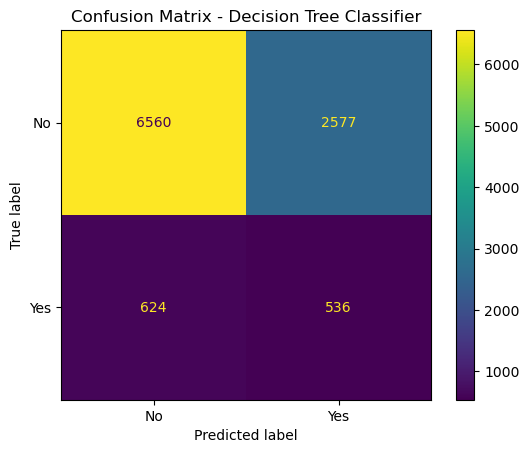

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=result_df['Confusion Matrix']['Decision Tree'], display_labels=['No', 'Yes'])
disp.plot()
disp.ax_.set_title("Confusion Matrix - Decision Tree Classifier")

{'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}


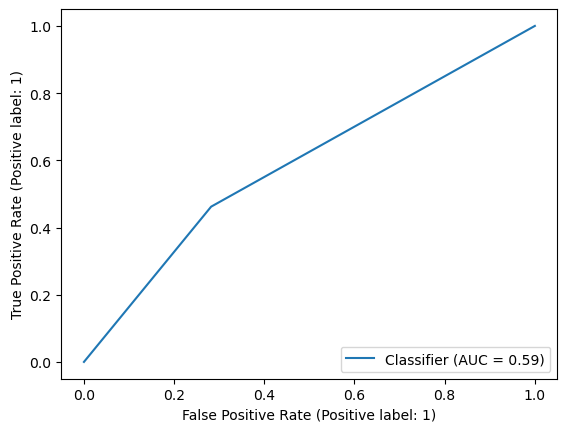

In [82]:
# Get best parameters of DT
print(grid_dt.best_params_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=grid_dt.predict(X_test))

Text(0.5, 1.0, 'Confusion Matrix - Decision Linear Regression')

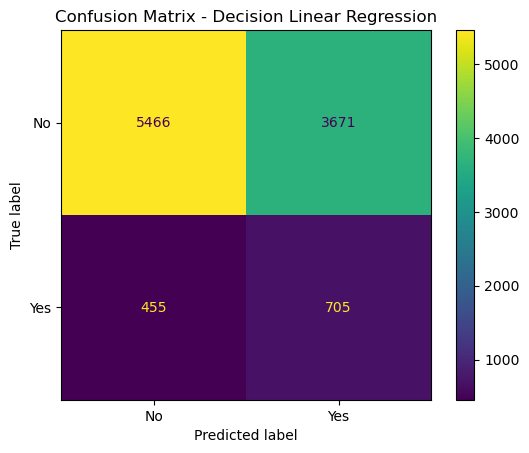

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=result_df['Confusion Matrix']['Linear Regression'], display_labels=['No', 'Yes'])
disp.plot()
disp.ax_.set_title("Confusion Matrix - Decision Linear Regression")

{'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


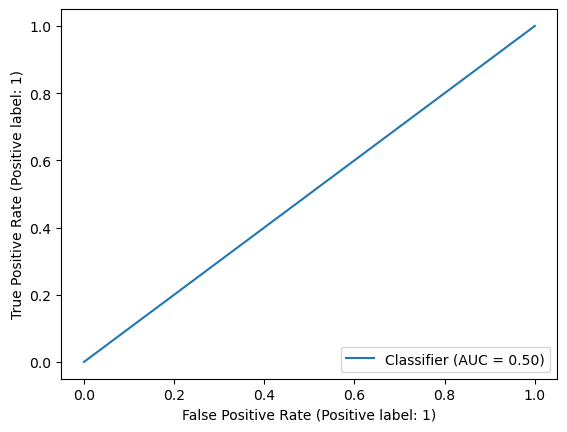

In [84]:
# Get best parameters of KNN
print(grid_search.best_params_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=grid_search.predict(X_test))

The models are performing better comparing to the first set of models where we considered fewer features and did not considered class weights in their training. Despite better perfromance of the modified models, there is still room for improvement such as selecting better features, defining class weights, or oversample/undersample our data before fitting the model. Another potential way to improve the performance is fine-tuning hyperparameters for optimization. Here we used GridSearchCV, however, we could use randomizedSearch or RandomizedSearchCV in order to fine tune the hyper parameters.